In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

2023-03-18 08:53:33.220582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

In [3]:
word_index = reuters.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[10]]
)

In [4]:
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [5]:
train_labels[10]

3

In [6]:
# multi-hot encoder with training

mlb = MultiLabelBinarizer(classes=np.array(range(0,10_000)))
X_train = mlb.fit_transform(train_data)
X_test = mlb.transform(test_data)

In [11]:
# one-hit encoder

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
model = keras.Sequential(
    [
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(46, activation='softmax')
    ]
)

2023-03-18 08:58:28.435689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
X_val = X_train[:1_000]
partial_X_train = X_train[1_000:]
y_val = y_train[:1_000]
partial_y_train = y_train[1_000:]

In [14]:
hist = model.fit(
    partial_X_train,
    partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.7262 - accuracy: 0.5416 - val_loss: 1.8146 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4550 - accuracy: 0.7056 - val_loss: 1.3364 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0595 - accuracy: 0.7736 - val_loss: 1.1237 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8362 - accuracy: 0.8236 - val_loss: 1.0262 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6640 - accuracy: 0.8598 - val_loss: 0.9715 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5299 - accuracy: 0.8895 - val_loss: 0.9348 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4266 - accuracy: 0.9116 - val_loss: 0.8666 - val_accuracy: 0.8180
Epoch 8/20
16

<AxesSubplot: >

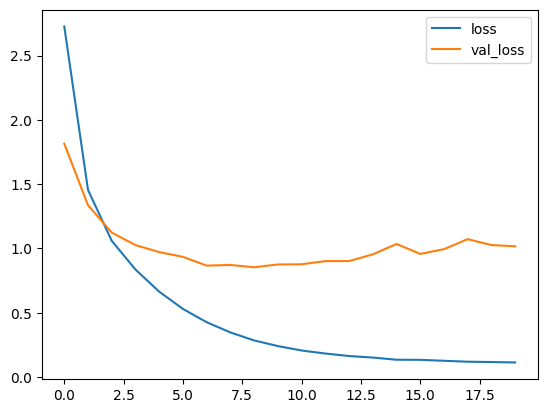

In [15]:
hist_df = pd.DataFrame(hist.history)
hist_df.plot(y=['loss','val_loss'])

In [20]:
# Train model only 9 epochs

model = keras.Sequential(
    [
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(46, activation='softmax')
    ]
)

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist_9epoch = model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=9
)

Epoch 1/9
18/18 [==============================] - 0s 11ms/step - loss: 2.4974 - accuracy: 0.5256
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.3519 - accuracy: 0.7112
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.0055 - accuracy: 0.7784
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 0.7877 - accuracy: 0.8293
Epoch 5/9
18/18 [==============================] - 0s 11ms/step - loss: 0.6194 - accuracy: 0.8696
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.4952 - accuracy: 0.8980
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3965 - accuracy: 0.9156
Epoch 8/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3242 - accuracy: 0.9297
Epoch 9/9
18/18 [==============================] - 0s 11ms/step - loss: 0.2685 - accuracy: 0.9389


In [21]:
result = model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 1.0244 - accuracy: 0.7792


In [22]:
# Loss Accuracy

result

[1.0243546962738037, 0.7791629433631897]

In [24]:
predictions = model.predict(X_test)

71/71 [==============================] - 0s 1ms/step


In [25]:
predictions.shape

(2246, 46)

In [26]:
np.argmax(predictions, axis=1)

array([ 4, 10,  1, ...,  3,  4,  1])

In [27]:
np.array(train_labels)

array([ 3,  4,  3, ..., 25,  3, 25])